In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("arima.csv")
print(data.shape)
data.head(5)

(107, 2)


,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
data.columns

Index(['Month', 'Perrin Freres monthly champagne sales millions ?64-?72'], dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [5]:
data.describe(include="all")

,Month,Perrin Freres monthly champagne sales millions ?64-?72
count,106,105.000000
unique,106,NaN
top,1967-08,NaN
freq,1,NaN
mean,NaN,4761.152381
std,NaN,2553.502601
min,NaN,1413.000000
25%,NaN,3113.000000
50%,NaN,4217.000000
75%,NaN,5221.000000


In [6]:
data.tail(5)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [7]:
data.isnull().values.sum()

3

In [8]:
data.dropna(inplace=True)
data.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [9]:
data.shape

(105, 2)

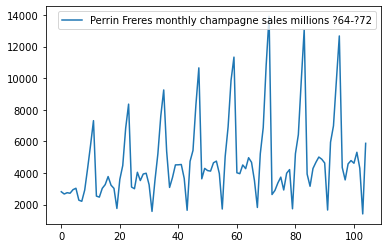

In [10]:
data.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027BC7A5BC18>]],
      dtype=object)

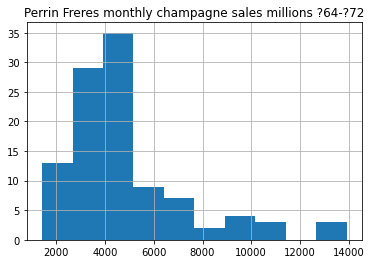

In [11]:
data.hist()

In [12]:
type(data.values)

numpy.ndarray

In [13]:
data.columns=["Months","sales"]
data.head(1)

,Months,sales
0,1964-01,2815.0


In [14]:
data.tail()

,Months,sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [15]:
data["Months"]=pd.to_datetime(data["Months"])
data.head()

,Months,sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [16]:
data.set_index("Months",inplace=True)


In [17]:
data.head()

,sales
Months,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [18]:
from statsmodels.tsa.stattools import adfuller
test=adfuller(data["sales"])

In [19]:
def adfullertest(sales):
    result=adfuller(sales)
    lables=["ADF","P value","lags used","no of obersevation used"]
    for value,lables in zip(result,lables):
        print(lables+ " : "+str(value))
    if result[1]<=.05:
        print("strong  againts NULL ")
    else:
        print("weak againts NULL")

In [20]:
adfullertest(data["sales"])

ADF : -1.8335930563276297
P value : 0.3639157716602417
lags used : 11
no of obersevation used : 93
weak againts NULL


In [21]:
data["first differnce"]=data["sales"]-data["sales"].shift(1)

In [22]:
data["12 diffrence"]=data["sales"]-data["sales"].shift(12)

In [23]:
data.head(15)

,sales,first differnce,12 diffrence
Months,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [24]:
adfullertest(data["12 diffrence"].dropna())

ADF : -7.626619157213163
P value : 2.060579696813685e-11
lags used : 0
no of obersevation used : 92
strong  againts NULL 


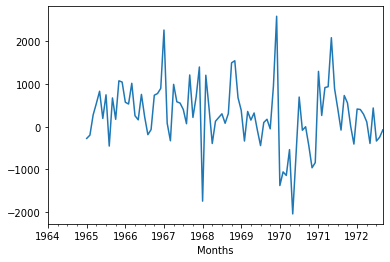

In [25]:
data["12 diffrence"].plot()

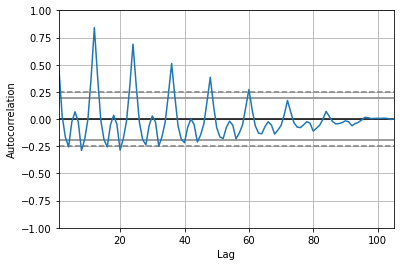

In [35]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['sales'])
plt.show()

C:\Users\Padam\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


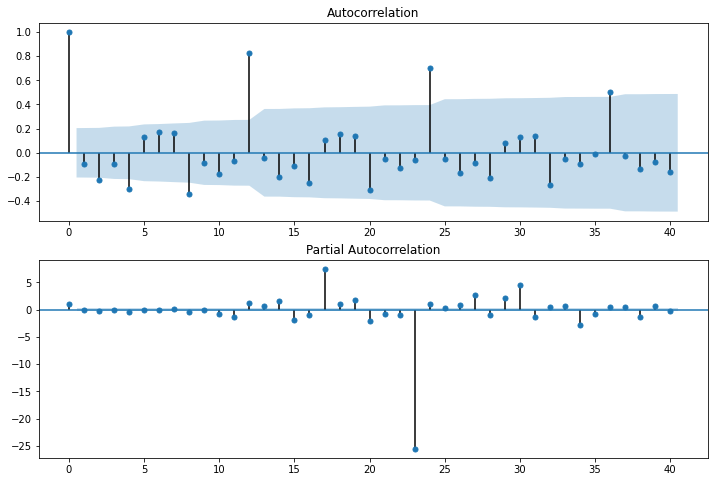

In [46]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data["first differnce"].iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data["first differnce"].iloc[13:],lags=40,ax=ax2)

In [44]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data["sales"],order=(1,1,1))
model_fit=model.fit()

model_fit.summary()

C:\Users\Padam\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Padam\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Mon, 10 Aug 2020   AIC                           1910.251
Time:                        08:48:13   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7829     12.405      1.837      0.066      -1.531      47.097
ar.L1.D.sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

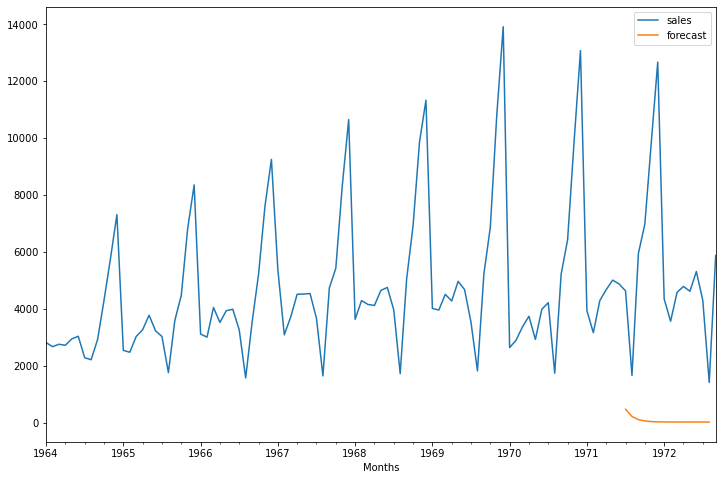

In [45]:
data['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
data[['sales','forecast']].plot(figsize=(12,8))

In [47]:
model=sm.tsa.statespace.SARIMAX(data["sales"],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\Padam\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Padam\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


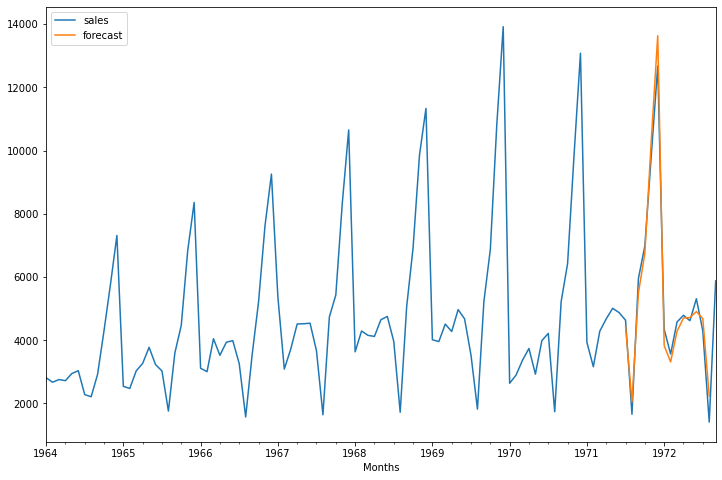

In [48]:
data['forecast']=results.predict(start=90,end=103,dynamic=True)
data[['sales','forecast']].plot(figsize=(12,8))

In [50]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [52]:
future_datest_data=pd.DataFrame(index=future_dates[1:],columns=data.columns)
future_datest_data.tail()

,sales,first differnce,12 diffrence,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


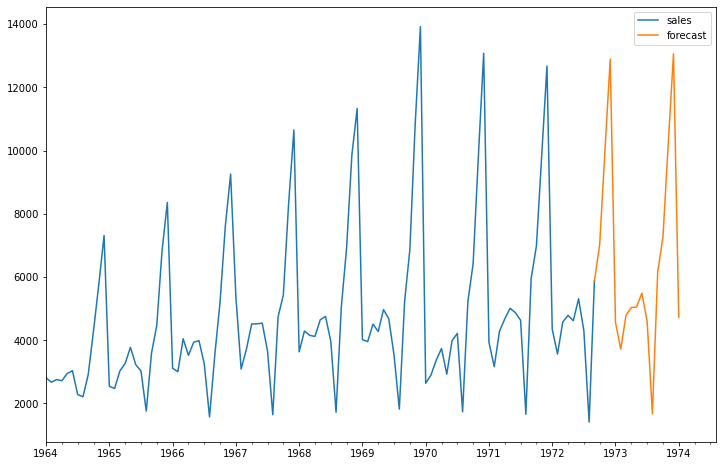

In [56]:
future_data=pd.concat([data,future_datest_data])
future_data['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_data[['sales', 'forecast']].plot(figsize=(12, 8))